In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from pickle import dump
!pip install tensorflow_addons
import tensorflow_addons as tfa

In [2]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#Importing Input data
data_cohesion = np.load('Inputs/4ft_cohesion.npy')
data_friction = np.load('Inputs/4ft_friction.npy')
data_poly = np.load('Inputs/4ft_poly_feature.npy')
data_watertable = np.load('Inputs/4ft_water_table.npy')
data_velo = np.load("Targets/4ft_velocity_plots.npy")
data_watertable = np.squeeze(data_watertable)

In [4]:
#Size
data_cohesion = np.transpose(data_cohesion)
data_friction = np.transpose(data_friction)
data_watertable = np.transpose(data_watertable)
data_watertable = np.squeeze(data_watertable)
data_velo = data_velo[0:33,:,:]
print(np.shape(data_cohesion))
print(np.shape(data_friction))
print(np.shape(data_watertable))
print(np.shape(data_velo))
m = np.shape(data_cohesion)[1]
n_sim = np.shape(data_velo)[2]
n_final_test = 0
n_remain = n_sim - n_final_test
mo = np.shape(data_velo)[0]

(236091, 16)
(236091, 16)
(236091,)
(33, 33, 236091)


In [5]:
li= []
for i in range (n_sim):
    temp = np.reshape(data_velo[:,:,i],(mo*mo,1))
    li.append(temp)
data = np.array(li)

In [6]:
data_arr= np.zeros((n_remain,2*m + 1))
data_arr[0:n_remain,0:m] = data_cohesion[0:n_remain,:]
data_arr[0:n_remain,m:2*m] = data_friction[0:n_remain,:]
data_arr[0:n_remain,2*m] = data_watertable[0:n_remain]

In [7]:
data_x = data_arr
data_y = data[0:n_remain,:,:]
data_y = np.reshape(data_y, (n_remain,mo*mo))

In [8]:
np.shape(data_y)

(236091, 1089)

In [9]:
data_y1 = np.zeros((np.shape(data_y)))
for i in range(n_sim):
    data_y1[i,:] = data_y[i,:]/np.max(data_y[i,:]) 
    

In [10]:
np.shape(data_arr)

(236091, 33)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y1, test_size=0.1, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#y_train = sc.fit_transform(y_train)
#y_test = sc.fit_transform(y_test)
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units = 2752,activation = 'relu'))
#ann1.add(tf.keras.layers.Dense(units = 512,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 2500,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 2560,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 512,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 512,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 512,activation = 'relu'))
#Output Layer
ann1.add(tf.keras.layers.Dense(units = 1089 , activation = 'linear'))
metric = tfa.metrics.r_square.RSquare()
ann1.compile(
        optimizer=keras.optimizers.Adam(learning_rate=  1e-4),
        loss='mean_absolute_error',
        metrics=[metric])
ann1.fit(x_train,y_train,batch_size = 32, epochs = 100)
#ann1.save('ann_velo_final_1.h5')

Epoch 1/100
6641/6641 [==============================] - 52s 8ms/step - loss: 0.0536 - r_square: 0.1716
Epoch 2/100
6641/6641 [==============================] - 52s 8ms/step - loss: 0.0383 - r_square: 0.4341
Epoch 3/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0332 - r_square: 0.5173
Epoch 4/100
6641/6641 [==============================] - 59s 9ms/step - loss: 0.0300 - r_square: 0.5628
Epoch 5/100
6641/6641 [==============================] - 59s 9ms/step - loss: 0.0276 - r_square: 0.5975
Epoch 6/100
6641/6641 [==============================] - 58s 9ms/step - loss: 0.0259 - r_square: 0.6237
Epoch 7/100
6641/6641 [==============================] - 58s 9ms/step - loss: 0.0244 - r_square: 0.6457
Epoch 8/100
6641/6641 [==============================] - 58s 9ms/step - loss: 0.0230 - r_square: 0.6638
Epoch 9/100
6641/6641 [==============================] - 58s 9ms/step - loss: 0.0220 - r_square: 0.6811
Epoch 10/100
6641/6641 [==============================] - 57s 9m

6641/6641 [==============================] - 58s 9ms/step - loss: 0.0078 - r_square: 0.9045
Epoch 80/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0077 - r_square: 0.9051
Epoch 81/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0077 - r_square: 0.9051
Epoch 82/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0076 - r_square: 0.9062
Epoch 83/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0076 - r_square: 0.9067
Epoch 84/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0075 - r_square: 0.9064
Epoch 85/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0075 - r_square: 0.9081
Epoch 86/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0075 - r_square: 0.9083
Epoch 87/100
6641/6641 [==============================] - 57s 9ms/step - loss: 0.0075 - r_square: 0.9082
Epoch 88/100
6641/6641 [==============================] - 57s 9ms/st

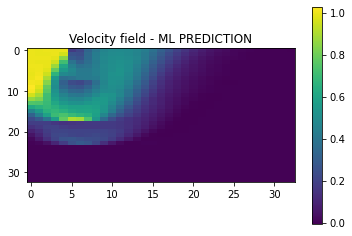

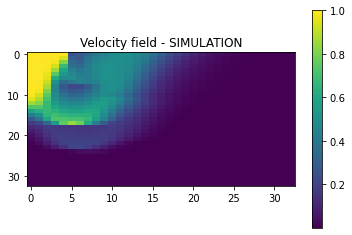

In [13]:
case = 800
a = np.reshape(y_pred[case,:],(33,33))
b = np.reshape(y_actual[case,:],(33,33))
fig, ax1 = plt.subplots()
im1 = ax1.imshow(a, interpolation='nearest', aspect=0.5)
fig.colorbar(im1)
plt.title("Velocity field - ML PREDICTION")
fig, ax2 = plt.subplots()
im2 = ax2.imshow(b, interpolation='nearest',aspect = 0.5)
fig.colorbar(im2)
plt.title("Velocity field - SIMULATION")
plt.show()


In [14]:
ann1.save('ann_velo_v3.h5')

In [15]:
# save the scaler
dump(sc, open('scale_v3.pkl', 'wb'))